# Module 5: Design

The aims of this lab are:

1. Learn about `matplotlib`'s colormaps, including the awesome `vidiris`. 
1. Learn how to adjust the design element of a basic plot in `matplotlib`. 
1. Understand the differences between bitmap and vector graphics. 
1. Learn what is SVG and how to create simple shapes in SVG. 

First, import `numpy` and `matplotlib` libraries (don't forget the `matplotlib inline` magic command if you are using Jupyter Notebook). 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

## Colors

We discussed colors for *categorical* and *quantitative* data. We can further specify the quantitative cases into *sequential* and *diverging*. "Sequential" means that the underlying value has a sequential ordering and the color also just needs to change sequentially and monotonically. 

In the "diverging" case, there should be a meaningful anchor point. For instance, the correlation values may be positive or negative. Both large positive correlation and large negative correlation are important and the sign of the correlation has an important meaning. Therefore, we would like to stitch two sequential colormap together, one from zero to +1, the other from zero to -1. 

### Categorical (qualitative) colormaps

To experiment with colormpas, let's create some data first. We will use the `numpy`'s `random` module to create some random data.

#### `numpy` 

`numpy` is one of the most important packages in Python. As the name suggests (`num` + `py`), it handles all kinds of numerical manipulations and is the basis of pretty much all scientific packages. Actually, a `pandas` "series" is essentially a `numpy` array and a dataframe is essentially a bunch of `numpy` arrays grouped together. If you use it wisely, it can easily give you 10x, 100x or even 1000x speed-up! 

If you use `pandas` or other packages, they may do all these numpy optimization under the hood for you. However, it is still good to know some basic `numpy` operations. If you want to study `numpy` more, check out the official tutorial and "From Python to Numpy" book:

- [Numpy Quickstart tutorial](https://docs.scipy.org/doc/numpy/user/quickstart.html)
- [From Python to Numpy](https://www.labri.fr/perso/nrougier/from-python-to-numpy/)

#### Plotting some trigonometric functions

Let's plot a sine and cosine function. By the way, a common trick to plot a function is creating a list of x coordinate values (evenly spaced numbers over an interval) first. `numpy` has a function called [`linspace`](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html) for that ("LINear SPACE"). By default, it creates 50 numbers that fill the interval that you pass. 

In [2]:
np.linspace(0, 3)

array([0.        , 0.06122449, 0.12244898, 0.18367347, 0.24489796,
       0.30612245, 0.36734694, 0.42857143, 0.48979592, 0.55102041,
       0.6122449 , 0.67346939, 0.73469388, 0.79591837, 0.85714286,
       0.91836735, 0.97959184, 1.04081633, 1.10204082, 1.16326531,
       1.2244898 , 1.28571429, 1.34693878, 1.40816327, 1.46938776,
       1.53061224, 1.59183673, 1.65306122, 1.71428571, 1.7755102 ,
       1.83673469, 1.89795918, 1.95918367, 2.02040816, 2.08163265,
       2.14285714, 2.20408163, 2.26530612, 2.32653061, 2.3877551 ,
       2.44897959, 2.51020408, 2.57142857, 2.63265306, 2.69387755,
       2.75510204, 2.81632653, 2.87755102, 2.93877551, 3.        ])

Let's just work with 10 numbers to make it easier to see. 

In [6]:
a = np.linspace(0, 3, 10)     # 10 numbers instead of 50 
a

array([0.        , 0.33333333, 0.66666667, 1.        , 1.33333333,
       1.66666667, 2.        , 2.33333333, 2.66666667, 3.        ])

A nice thing about `numpy` is that you can apply many mathematical operations as if you are dealing with a single number. 

In [8]:
# add 1 to each element of the array
a_plus_1 = a + 1
print(a_plus_1)

# multiply each element of the array by 3
a_times_3 = a * 3
print(a_times_3)

# raise each element of the array to the power of 2
a_squared = a ** 2
print(a_squared)

# take the square root of each element of the array
a_sqrt = np.sqrt(a)
print(a_sqrt)


[1.         1.33333333 1.66666667 2.         2.33333333 2.66666667
 3.         3.33333333 3.66666667 4.        ]
[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
[0.         0.11111111 0.44444444 1.         1.77777778 2.77777778
 4.         5.44444444 7.11111111 9.        ]
[0.         0.57735027 0.81649658 1.         1.15470054 1.29099445
 1.41421356 1.52752523 1.63299316 1.73205081]


These are called "**vectorized**" operations. Whenever you can, you should use vectorized operations instead of looping over the elements because they are way way faster and efficient. 


**Q: Let's plot some `sin` and `cos` functions.**

use `numpy`'s `sin` and `cos` functions with `matplotlib`'s `plot` function to plot. 

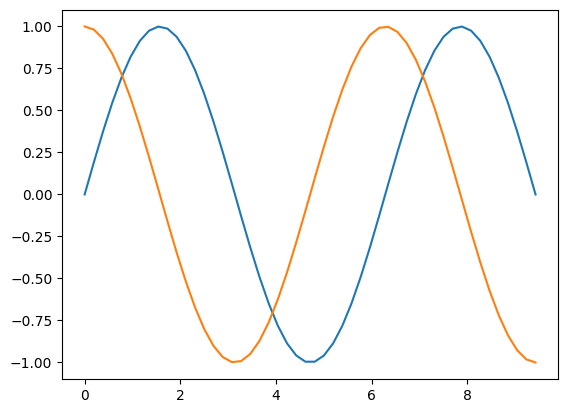

In [9]:
x = np.linspace(0, 3*np.pi)

# YOUR SOLUTION HERE

`matplotlib` picks a pretty good color pair by default! Orange-blue pair is colorblind-safe and it is like the color pair of [every movie](https://www.google.com/search?q=why+every+movie+orange+blue). 

`matplotlib` has many qualitative (categorical) colorschemes. https://matplotlib.org/users/colormaps.html 

![qualitative colormaps](http://matplotlib.org/_images/colormaps_reference_04.png) 

You can access them through the following ways:

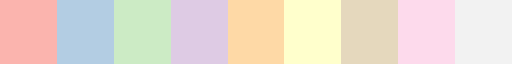

In [10]:
plt.cm.Pastel1

or

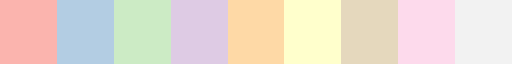

In [11]:
pastel1 = plt.get_cmap('Pastel1')
pastel1

You can also see the colors in the colormap in RGB (remember what each number means?). 

In [12]:
pastel1.colors

((0.984313725490196, 0.7058823529411765, 0.6823529411764706),
 (0.7019607843137254, 0.803921568627451, 0.8901960784313725),
 (0.8, 0.9215686274509803, 0.7725490196078432),
 (0.8705882352941177, 0.796078431372549, 0.8941176470588236),
 (0.996078431372549, 0.8509803921568627, 0.6509803921568628),
 (1.0, 1.0, 0.8),
 (0.8980392156862745, 0.8470588235294118, 0.7411764705882353),
 (0.9921568627450981, 0.8549019607843137, 0.9254901960784314),
 (0.9490196078431372, 0.9490196078431372, 0.9490196078431372))

To get the first and second colors, you can use either ways:

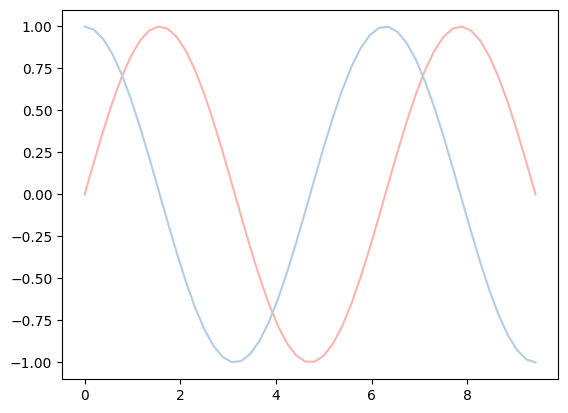

In [13]:
plt.plot(x, np.sin(x), color=plt.cm.Pastel1(0))
plt.plot(x, np.cos(x), color=pastel1(1))

**Q: pick a qualitative colormap and then draw four different curves with four different colors in the colormap.** 

Note that the colorschemes are not necessarily colorblindness-safe nor lightness-varied! Think about whether the colormap you chose is a good one or not based on the criteria that we discussed. 

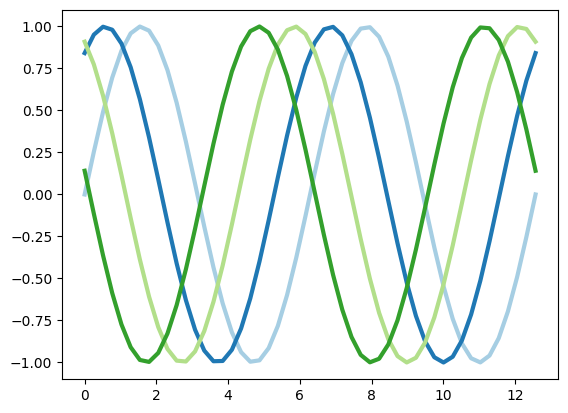

In [10]:
# TODO: put your code here
# YOUR SOLUTION HERE

## Quantitative colormaps

Take a look at the tutorial about image processing in `matplotlib`: https://matplotlib.org/stable/tutorials/introductory/images.html#sphx-glr-tutorials-introductory-images-py 

We can also display an image using quantitative (sequential) colormaps. Download the image of a snake: https://github.com/yy/dviz-course/blob/master/docs/m05-design/sneakySnake.png or use other image of your liking. 

Check out [`imread()`](http://matplotlib.org/api/image_api.html#matplotlib.image.imread) function that returns an `numpy.array()`.

In [14]:
import matplotlib.image as mpimg
import PIL
import urllib

In [15]:
img = np.array(PIL.Image.open('sneakySnake.png'))

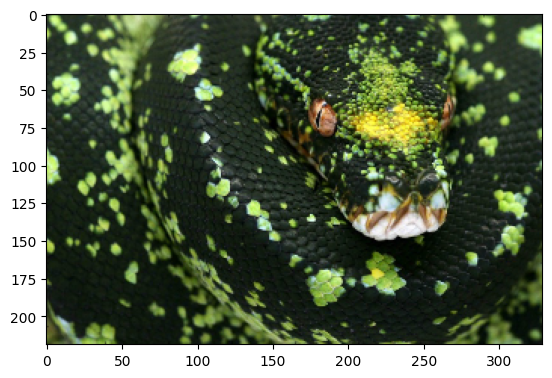

In [16]:
plt.imshow(img)

How is the image stored? 

In [17]:
img

array([[[ 39,  55,  36, 255],
        [ 42,  58,  40, 255],
        [ 44,  63,  37, 255],
        ...,
        [ 48,  57,  45, 255],
        [ 48,  61,  46, 255],
        [ 56,  76,  54, 255]],

       [[ 48,  65,  45, 255],
        [ 47,  67,  42, 255],
        [ 77, 103,  64, 255],
        ...,
        [ 47,  54,  46, 255],
        [ 46,  56,  47, 255],
        [ 44,  58,  45, 255]],

       [[ 47,  64,  46, 255],
        [ 63,  87,  51, 255],
        [107, 141,  81, 255],
        ...,
        [ 51,  61,  50, 255],
        [ 44,  54,  45, 255],
        [ 45,  57,  47, 255]],

       ...,

       [[ 86, 105,  45, 255],
        [ 76,  97,  37, 255],
        [ 72,  91,  35, 255],
        ...,
        [ 32,  45,  24, 255],
        [ 26,  38,  19, 255],
        [ 17,  28,  15, 255]],

       [[ 72,  90,  39, 255],
        [ 65,  83,  31, 255],
        [ 66,  82,  33, 255],
        ...,
        [ 17,  22,  16, 255],
        [ 15,  20,  14, 255],
        [ 16,  21,  17, 255]],

       [[ 53

`shape()` method lets you know the dimensions of the array. 

In [18]:
np.shape(img)

(219, 329, 4)

This means that `img` is a three-dimensional array with 219 x 329 x 4 numbers. If you look at the image, you can easily see that 219 and 329 are the dimensions (height and width in terms of the number of pixels) of the image. What is 4? 

We can actually create our own small image to investigate. Let's create a 3x3 image. 

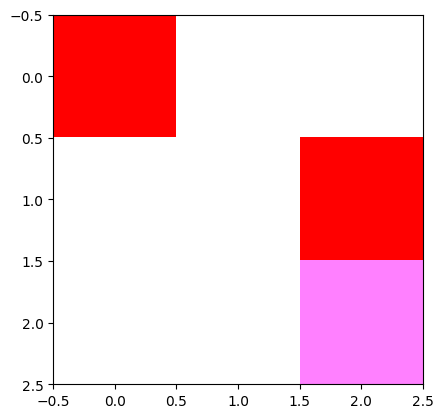

In [19]:
myimg = np.array([ [[1,0,0,1], [1,1,1,1], [1,1,1,1]], 
                   [[1,1,1,1], [1,1,1,1], [1,0,0,1]], 
                   [[1,1,1,1], [1,1,1,1], [1,0,1,0.5]] ])
plt.imshow(myimg)

**Q: Play with the values of the matrix, and explain what are each of the four dimensions (this matrix is 3x3x4) below.**

# YOUR SOLUTION HERE

### Applying other colormaps

Let's assume that the first value of the four dimensions represents some data of your interest. You can obtain `height x width x 1` matrix by doing `img[:,:,0]`, which means give me the all of the first dimension (`:`), all of the second dimension (`:`), but only the first one from the last dimension (`0`). 

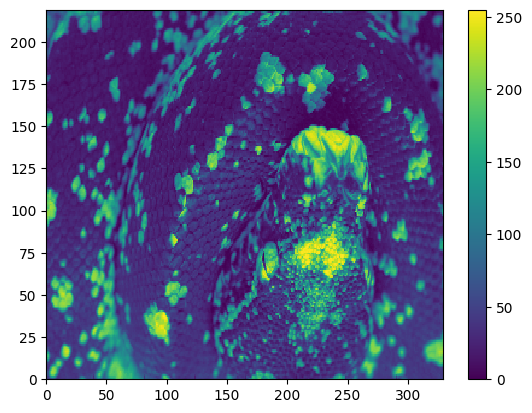

In [20]:
plt.pcolormesh(img[:,:,0], cmap=plt.cm.viridis)
plt.colorbar()

**Q: Why is it flipped upside down? Take a look at the previous `imshow` example closely and compare the axes across these two displays. Let's flip the figure upside down to show it properly. This function [`numpy.flipud()`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.flipud.html) may be handy.** 

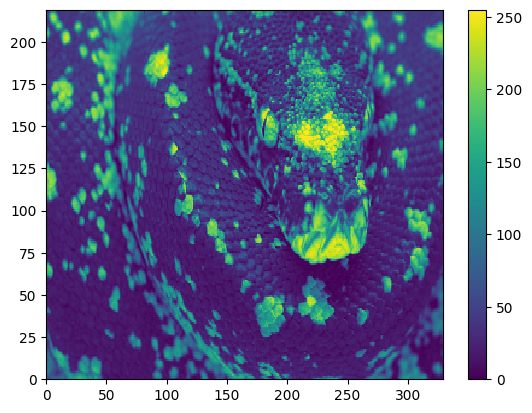

In [21]:
# TODO: put your code here

# YOUR SOLUTION HERE

**Q: Try another sequential colormap here.**

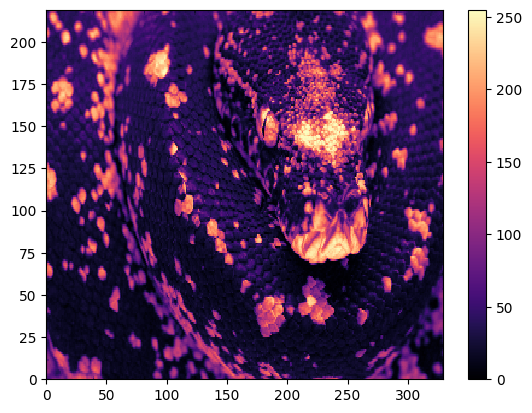

In [22]:
# TODO: put your code here

# YOUR SOLUTION HERE

**Q: Try a diverging colormap, say `coolwarm`**. 

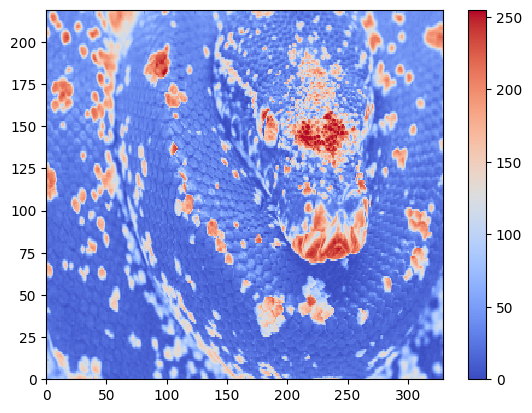

In [23]:
# TODO: put your code here

# YOUR SOLUTION HERE

Although there are clear choices such as `viridis` for quantitative data, you can come up with various custom colormaps depending on your application. For instance, take a look at this video about colormaps for Oceanography: https://www.youtube.com/watch?v=XjHzLUnHeM0 There is a colormap designed specifically for the *oxygen level*, which has three regimes. 

## Adjusting a plot

First of all, always label your axes!

https://flowingdata.com/2012/06/07/always-label-your-axes/

![label your axes](https://i2.wp.com/flowingdata.com/wp-content/uploads/2012/06/label-your-axes.png?w=500&ssl=1)

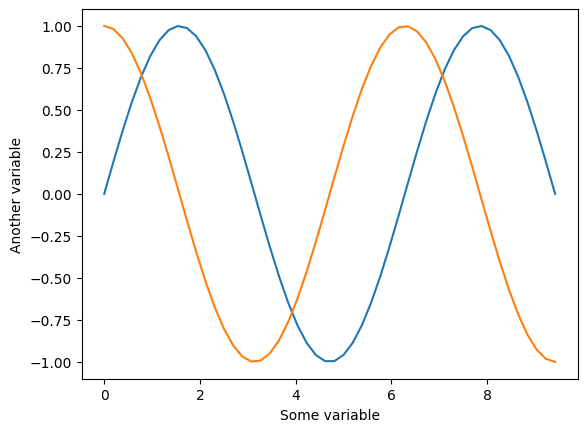

In [28]:
x = np.linspace(0, 3*np.pi)

plt.xlabel("Some variable")
plt.ylabel("Another variable")
plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x))

You can change the size of the whole figure by using `figsize` option. You specify the horizontal and vertical dimension in *inches*. 

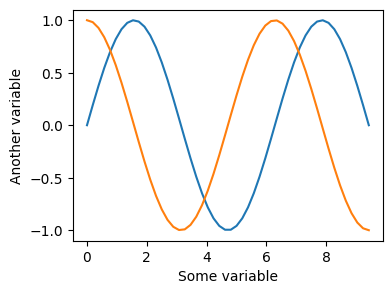

In [24]:
plt.figure(figsize=(4,3))
plt.xlabel("Some variable")
plt.ylabel("Another variable")
plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x))

A very common mistake is making the plot too big compared to the labels and ticks. 

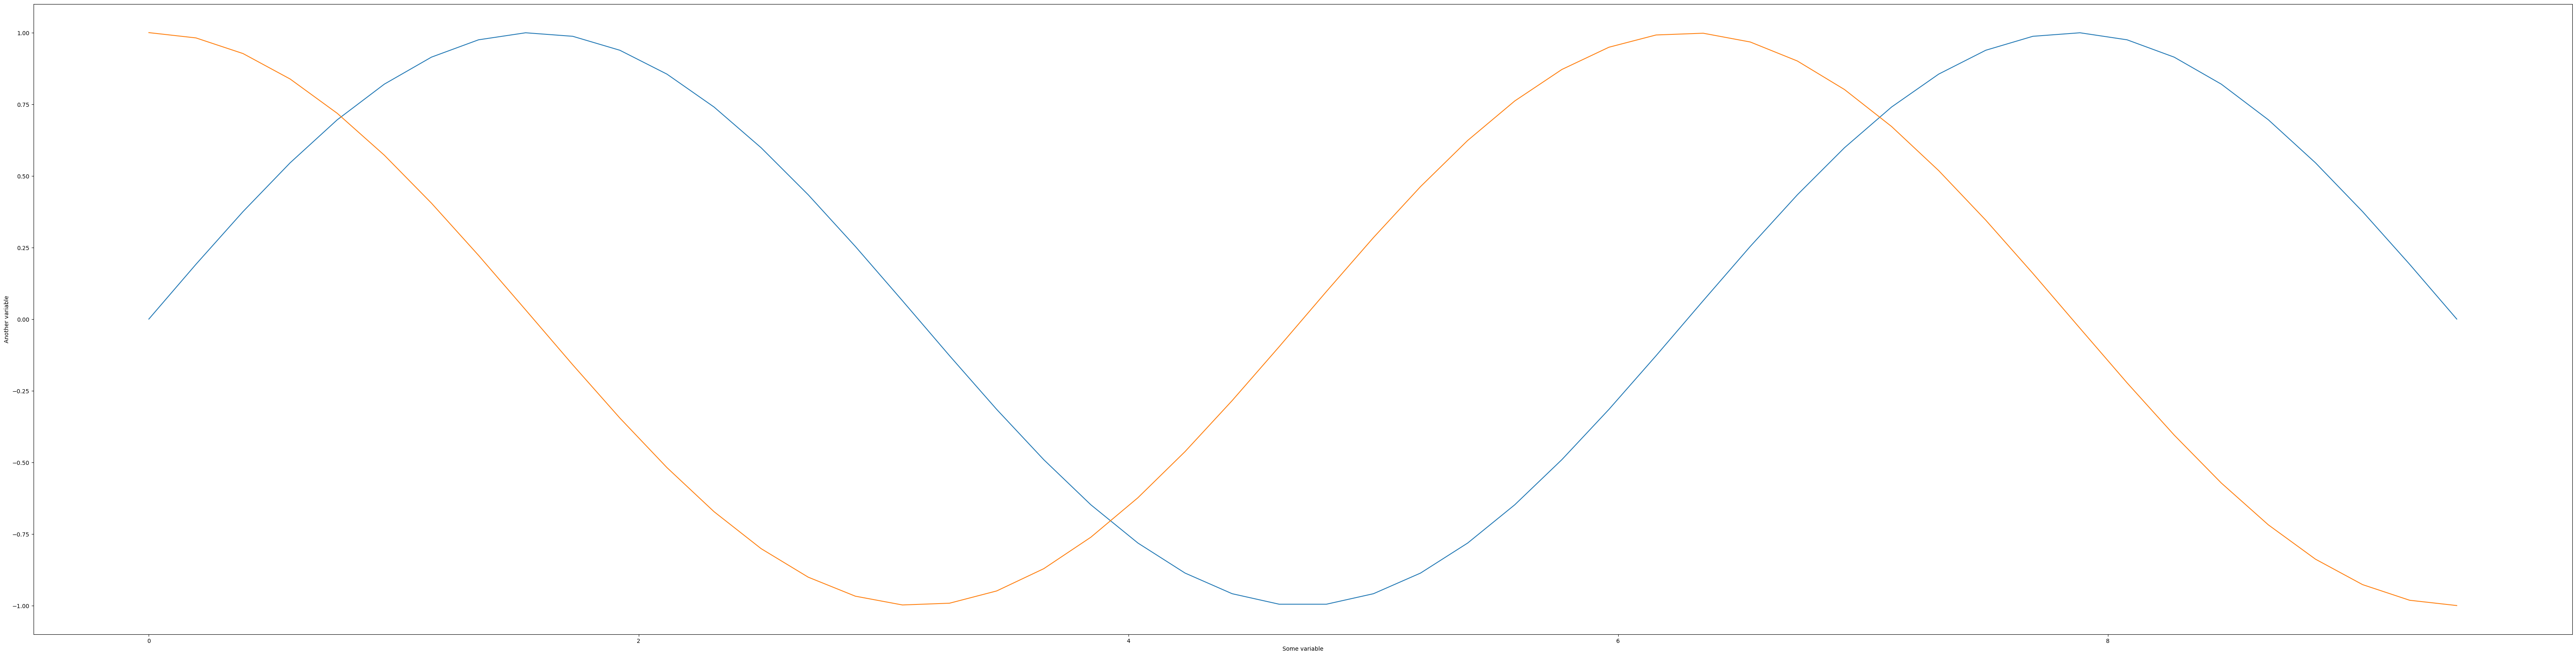

In [25]:
plt.figure(figsize=(80, 20))
plt.xlabel("Some variable")
plt.ylabel("Another variable")
plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x))

Once you shrink this plot into a reasonable size, you cannot read the labels anymore! Actually this is one of the most common comments that I provide to my students! 

You can adjust the range using `xlim` and `ylim`

(-0.5, 1.0)

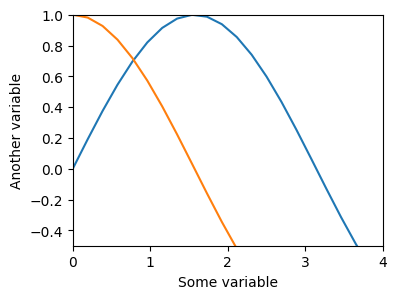

In [26]:
plt.figure(figsize=(4,3))
plt.xlabel("Some variable")
plt.ylabel("Another variable")
plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x))
plt.xlim((0,4))
plt.ylim((-0.5, 1))

You can adjust the ticks. 

([<matplotlib.axis.XTick at 0x11872c090>,
 [Text(0, 0, '0'), Text(4, 0, '4'), Text(8, 0, '8')])

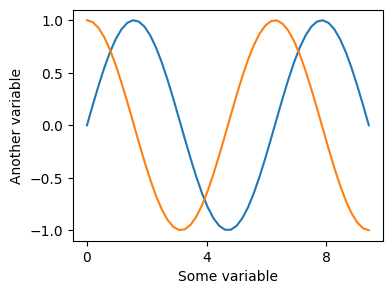

In [27]:
plt.figure(figsize=(4,3))
plt.xlabel("Some variable")
plt.ylabel("Another variable")
plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x))
plt.xticks(np.arange(0, 10, 4))

colors, linewidth, and so on. 

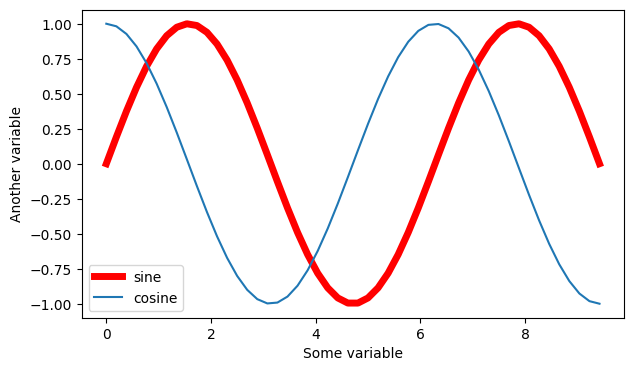

In [28]:
plt.figure(figsize=(7,4))
plt.xlabel("Some variable")
plt.ylabel("Another variable")
plt.plot(x, np.sin(x), color='red', linewidth=5, label="sine")
plt.plot(x, np.cos(x), label='cosine')
plt.legend(loc='lower left')

For more information, take a look at this excellent tutorial: https://github.com/rougier/matplotlib-tutorial 

**Q: Now, pick an interesting dataset (e.g. from `vega_datasets` package) and create a plot. Adjust the size of the figure, labels, colors, and many other aspects of the plot to obtain a nicely designed figure. Explain your rationales for each choice.**

In [29]:
# YOUR SOLUTION HERE

## SVG

First of all, think about various ways to store an image, which can be a beautiful scenary or a geometric shape. How can you efficiently store them in a computer? Consider pros and cons of different approaches. Which methods would work best for a photograph? Which methods would work best for a blueprint or a histogram? 

![](https://upload.wikimedia.org/wikipedia/commons/3/3b/Rgb-raster-image.svg)

There are two approaches. One is storing the color of each pixel as shown above. This assumes that each pixel in the image contains some information, which is true in the case of photographs. Obviously, in this case, you cannot zoom in more than the original resolution of the image (<del>if you're not in the movie</del>). Also if you just want to store some geometric shapes, you will be wasting a lot of space. This is called **raster graphics**. 

<img src="https://upload.wikimedia.org/wikipedia/commons/a/aa/VectorBitmapExample.svg" width="600px">

Another approach is using **vector graphics**, where you store the *instructions* to draw the image rather than the color values of each pixel. For instance, you can store "draw a circle with a radius of 5 at (100,100) with a red line" instead of storing all the red pixels corresponding to the circle. Compared to [raster graphics](https://en.wikipedia.org/wiki/Raster_graphics), [vector graphics](https://en.wikipedia.org/wiki/Vector_graphics) won't lose quality when zooming in. 

Since a lot of data visualization tasks are about drawing geometric shapes, vector graphics is a common option. Most libraries allow you to save the figures in vector formats. 

On the web, a common standard format is [SVG](http://www.w3schools.com/svg/). SVG stands for "*Scalable Vector Graphics*". Because it's really a list of instructions to draw figures, you can create one even using a basic text editor. What many web-based drawing libraries do is simply writeing down the instructions (SVG) into a webpage, so that a web browser can show the figure. The SVG format can be edited in many vector graphics software such as Adobe Illustrator and Inkscape. Although we rarely touch the SVG directly when we create data visualizations, I think it's very useful to understand what's going on under the hood. So let's get some intuitive understanding of SVG. 

You can put an SVG figure by simply inserting a `<svg>` tag in an HTML file. It  tells the browser to reserve some space for a drawing. For example,

	<svg width="200" height="200">
	   <circle cx="100" cy="100" r="22" fill="yellow" stroke="orange" stroke-width="5"/>
	</svg>

This code creates a drawing space of 200x200 pixels. And then draw a circle of radius 22 at (100,100). The circle is filled with yellow color and *stroked* with 5-pixel wide orange line. That's pretty simple, isn't it? Place this code into an HTML file and open with your browser. Do you see this circle? 

Another cool thing is that, because `svg` is an HTML tag, you can use `CSS` to change the styles of your shapes. You can adjust all kinds of styles using `CSS`:

	<head>
	<style>
	.krypton_sun {
	  fill: red;
	  stroke: orange;
	  stroke-width: 10;
	}
	</style>
	</head>
	<body>
	<svg width="500" height="500">
	   <circle cx="200" cy="200" r="50" class="krypton_sun"/>
	</svg>
	</body>

This code says "draw a circle with a radius 50 at (200, 200), with the style defined for `krypton_sun`". The style `krypton_sun` is defined with the `<style>` tag. 

There are other shapes in SVG, such as [ellipse](http://www.w3schools.com/graphics/svg_ellipse.asp), [line](http://www.w3schools.com/graphics/svg_line.asp), [polygon](http://www.w3schools.com/graphics/svg_polygon.asp) (this can be used to create triangles), and [path](http://www.w3schools.com/graphics/svg_path.asp) (for curved and other complex lines). You can even place text with advanced formatting inside an `svg` element.

### Exercise: 

Let's reproduce the symbol for the Deathly Hallows (as shown below) with SVG. It doesn't need to be a perfect duplication (an equilateral triangle, etc), just be visually as close as you can. What's the most efficient way of drawing this? Color it in the way you like. Upload this file to canvas.

![The deathly hallows](http://vignette1.wikia.nocookie.net/harrypotter/images/2/23/Hallows.png/revision/latest/scale-to-width-down/160?cb=20090309113642)

